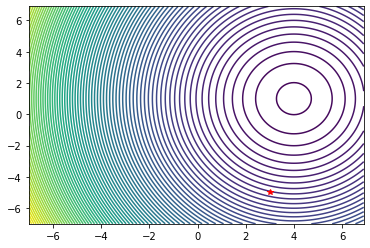

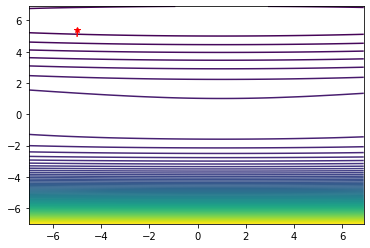

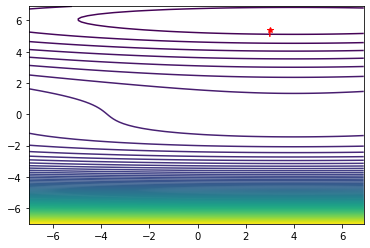

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Векторная функция f(x) где x=[x1,x2,x3]
def f(x):
    return (-20.0 * math.exp(-0.2 * math.sqrt(0.5 * (x[0]**2 + x[1]**2))) - math.exp(0.5 * (math.cos(2 * math.pi * x[0]) + math.cos(2 * math.pi * x[1]))) + math.e + 20)

# Для построения contour графика векторная функция не подходит
def f_for_plot(x,y,z):
    return -(-2*x**2+16*x-y**2+2*y-3*z**4+24*z**3-72*z+96*z-77)

# https://www.wolframalpha.com/input/?i=gradient+-2*x[0]**2%2B16*x[0]-x[1]**2%2B2*x[1]-3*x[2]**4%2B24*x[2]**3-72*x[2]%2B96*x[2]-77
def grad(x):
    return -np.array([-4*(x[0] - 4), 2 - 2*x[1], -12*(x[2]**3 - 6*x[2]**2 - 2)])

# https://www.wolframalpha.com/input/?i=hessian+-2*x[0]**2%2B16*x[0]-x[1]**2%2B2*x[1]-3*x[2]**4%2B24*x[2]**3-72*x[2]%2B96*x[2]-77
def hessian(x):
    return np.array([[-4, 0, 0], [0, -2, 0], [0, 0, 144*x[2] - 36*x[2]**2]])

phi=0.5 * (1.0 + np.sqrt(5.0))
            
def zolot_sech(f,a,b): 
    eps=0.05
    if abs(b-a)<eps: 
        return (a+b)/2
    else:
        t=(b-a)/phi
        x1=b-t
        x2=a+t
        if f(x1)>=f(x2):
            return zolot_sech(f,x1,b)
        else:
            return zolot_sech(f,a,x2)

epsilon = 0.0001 #Точность
p=np.zeros(3) 
beta=0 
x=np.array([3,-5,5]) # Начальная точка xk=x0
x_old=np.ones(3)*10**3 # Предыдущая точка
dots=[]
i=0
while np.linalg.norm(x-x_old)>epsilon:
#     print(i)
    i+=1
    p=(-grad(x)+beta*p)
    p=p/np.linalg.norm(p)

    def F(alpha):
        return f(x+alpha*p)

    alpha=zolot_sech(F,0,scolz_okno(F))

    x_old=x
    dots.append(x)
    x=x+alpha*p

    beta=np.dot(grad(x),grad(x)-grad(x-x_old))/np.linalg.norm(x_old)**2

xmax,ymax,zmax=x
X,Y,Z=np.array(dots).T
xlist,ylist=np.meshgrid(np.arange(-7,7,0.1),np.arange(-7,7,0.1))

# plt.subplot(131)
# plt.contourf(xlist,ylist,f_for_plot(xlist,ylist,zmax),100)
plt.contour(xlist,ylist,f_for_plot(xlist,ylist,zmax),100)
plt.plot(X,Y,'-r')
plt.plot(xmax,ymax,'r*')
plt.show()
# plt.subplot(132)
# plt.contourf(xlist,ylist,f_for_plot(xmax,xlist,ylist),100)
plt.contour(xlist,ylist,f_for_plot(xmax,xlist,ylist),100)
plt.plot(Y,Z,'-r')
plt.plot(ymax,zmax,'r*')
plt.show()

# plt.subplot(133)
# plt.contourf(xlist,ylist,f_for_plot(xlist,ymax,ylist),100)
plt.contour(xlist,ylist,f_for_plot(xlist,ymax,ylist),100)
plt.plot(X,Z,'-r')
plt.plot(xmax,zmax,'r*')

plt.show()

In [18]:
print('Итераций: ',i)
print(x,'- точка максимума функции')
print(-f(x),'- максимума функции')

Итераций:  5
[ 3.00470582 -4.9858821   5.37985077] - точка максимума функции
-11.225906454023395 - максимума функции


In [19]:
sobstv=np.linalg.eig(hessian(x))[0] # Собственные значения матрицы Гессе
k=np.abs(np.max(sobstv)/np.min(sobstv)) # Коэфф. овражности
print('Коэффициент овражности k=',k)

Коэффициент овражности k= 0.0074838512550230605
